In [1]:
import pandas as pd

In [2]:
file_path = './data/Survey/Experiment Survey.xlsx'

In [3]:
data = pd.read_excel(file_path, sheet_name='all responses')

In [9]:
import pandas as pd

def process_experimentsurvey(file_path):
    # Define mappings and reverse items for each survey
    survey_info = {
        "SSQ_N": {
            "page" : "P2",
            "questions": [2,7,8,9,10,16,17],
            "mapping": {"증상 없음": 0, "약한 증상": 1, "보통 증상": 2, "심한 증상": 3},
            "reverse": []
        },
        "SSQ_O": {
            "page" : "P2",
            "questions": [2,7,8,9,10,16,17],
            "mapping": {"증상 없음": 0, "약한 증상": 1, "보통 증상": 2, "심한 증상": 3},
            "reverse": []

        },
        "SSQ_D": {
            "page" : "P2",
            "questions": [6,9,11,12,13,14,15],
            "mapping": {"증상 없음": 0, "약한 증상": 1, "보통 증상": 2, "심한 증상": 3},
            "reverse": []
        },

        "IPQ_SP": {
            "page" : "P3",
            "questions": [3,4,5,6,7],
            "mapping": {"1": 0,"2": 1, "3": 2, "4": 3, "5": 4, "6": 5, "7": 6},
            "reverse": [3,4],
        },
        "IPQ_INV": {
            "page" : "P3",
            "questions": [8,9,10,11],
            "mapping": {"1": 0,"2": 1, "3": 2, "4": 3, "5": 4, "6": 5, "7": 6},
            "reverse": [9],
        },
        "IPQ_REAL": {
            "page" : "P3",
            "questions": [12,13,14,15],
            "mapping": {"1": 0,"2": 1, "3": 2, "4": 3, "5": 4, "6": 5, "7": 6},
            "reverse": [11],
        },
        "IPQ_PRES": {
            "page" : "P3",
            "questions": [2],
            "mapping": {"1": 0,"2": 1, "3": 2, "4": 3, "5": 4, "6": 5, "7": 6},
            "reverse": [],
        },
        "STAI_Y_S": {
            "page" : "P4",
            "questions": list(range(2,22)),
            "mapping": {"전혀 그렇지 않다": 1, "조금 그렇다": 2, "보통으로 그렇다": 3, "대단히 그렇다": 4},  # Numeric strings map directly
            "reverse": [1, 2, 5, 8, 10, 11, 15, 16, 19, 20],
        },
    }

    # Load the Excel file
    data = pd.read_excel(file_path, sheet_name='all responses')
    data = data.iloc[:, 3:]
    # Initialize a dictionary to store processed survey results
    processed_data = {}

    for survey, info in survey_info.items():
        # Extract relevant columns
        page = info["page"]
        questions = [f"{page}B{i}" for i in info["questions"]]
        survey_responses = data[questions].copy()
        

        # Apply mappings
        if info["mapping"]:
            survey_responses = survey_responses.replace(info["mapping"])
            for i in range(len(survey_responses.loc[2])):
                if type(survey_responses.loc[2][i]) != int:
                    print(type(survey_responses.loc[2][i]), i, page)
            
        # print(f"\n🔍 Checking reverse-scored items for survey: {survey}")
        # print(f"questions = {questions}")
        # print(f"reverse indices (1-based) = {info['reverse']}")
        # Handle reverse-scored items
        if info["reverse"]:
            reverse_questions = [f"{page}B{i+1}" for i in info["reverse"] if f"{page}B{i+1}" in questions]
            max_score = max(info["mapping"].values()) if info["mapping"] else survey_responses.max().max()
    #         survey_responses[reverse_questions] = max_score + 1 - survey_responses[reverse_questions]

    #     # Calculate total score
        processed_data[survey] = survey_responses.loc[2:].sum(axis=1)
    

    # Combine results into a DataFrame
    final_results = pd.DataFrame(processed_data)
    final_results = final_results

    ## Save to an Excel file
    # output_path = file_path.replace('.xlsx', '_processed.xlsx')
    # final_results.to_excel(output_path, index=False)

    return final_results

In [10]:

survey_data = process_experimentsurvey(file_path)

In [12]:
survey_data

,SSQ_N,SSQ_O,SSQ_D,IPQ_SP,IPQ_INV,IPQ_REAL,IPQ_PRES,STAI_Y_S
2,8.0,8.0,7.0,26.0,20.0,15.0,4.0,38.0
3,14.0,14.0,3.0,23.0,15.0,17.0,4.0,36.0
4,0.0,0.0,0.0,19.0,12.0,11.0,3.0,44.0
5,0.0,0.0,0.0,20.0,17.0,16.0,5.0,45.0
6,1.0,1.0,0.0,22.0,16.0,13.0,4.0,37.0
...,...,...,...,...,...,...,...,...
105,8.0,8.0,11.0,25.0,22.0,13.0,7.0,32.0
106,2.0,2.0,1.0,13.0,11.0,14.0,3.0,48.0
107,0.0,0.0,0.0,17.0,15.0,14.0,5.0,43.0
108,2.0,2.0,0.0,19.0,18.0,17.0,6.0,44.0


In [16]:
def compute_ssq_scores(df):
    df = df.copy()
    df["SSQ_Nausea"] = df["SSQ_N"] * 9.54
    df["SSQ_Oculomotor"] = df["SSQ_O"] * 7.58
    df["SSQ_Disorientation"] = df["SSQ_D"] * 13.92
    df["SSQ_Total"] = (df["SSQ_N"] + df["SSQ_O"] + df["SSQ_D"]) * 3.74
    return df[["SSQ_Nausea", "SSQ_Oculomotor", "SSQ_Disorientation", "SSQ_Total"]]

def compute_ipq_scores(df):
    df = df.copy()
    
    # 하위 척도 문항 수
    n_sp, n_inv, n_real = 5, 4, 3

    # 평균 점수 계산
    df["IPQ_SP_mean"] = df["IPQ_SP"] / n_sp
    df["IPQ_INV_mean"] = df["IPQ_INV"] / n_inv
    df["IPQ_REAL_mean"] = df["IPQ_REAL"] / n_real
    df["IPQ_Total_mean"] = (
        df["IPQ_SP"] + df["IPQ_INV"] + df["IPQ_REAL"]
    ) / (n_sp + n_inv + n_real)

    return df[["IPQ_SP_mean", "IPQ_INV_mean", "IPQ_REAL_mean", "IPQ_Total_mean"]]
def merge_processed_scores(df):
    ssq = compute_ssq_scores(df)
    ipq = compute_ipq_scores(df)

    # STAI_Y_S도 포함
    stai = df[["STAI_Y_S"]]

    # 인덱스 유지하며 merge
    final_df = pd.concat([ssq, ipq, stai], axis=1)
    return final_df


In [17]:
final_scores = merge_processed_scores(survey_data)


In [22]:
final_scores[final_scores["SSQ_Total"] > 80]

,SSQ_Nausea,SSQ_Oculomotor,SSQ_Disorientation,SSQ_Total,IPQ_SP_mean,IPQ_INV_mean,IPQ_REAL_mean,IPQ_Total_mean,STAI_Y_S
2,76.32,60.64,97.44,86.02,5.2,5.00,5.000000,5.083333,38.0
3,133.56,106.12,41.76,115.94,4.6,3.75,5.666667,4.583333,36.0
25,95.40,75.80,125.28,108.46,5.0,4.25,5.333333,4.833333,33.0
30,114.48,90.96,69.60,108.46,4.8,3.00,4.666667,4.166667,37.0
36,104.94,83.38,139.20,119.68,3.6,4.25,4.000000,3.916667,34.0
38,85.86,68.22,69.60,86.02,5.0,4.00,4.333333,4.500000,37.0
64,104.94,83.38,97.44,108.46,4.6,2.75,3.666667,3.750000,31.0
71,143.10,113.70,139.20,149.60,4.6,4.00,5.000000,4.500000,34.0
79,95.40,75.80,125.28,108.46,3.8,3.75,3.333333,3.666667,36.0
88,104.94,83.38,125.28,115.94,4.4,4.25,5.666667,4.666667,39.0


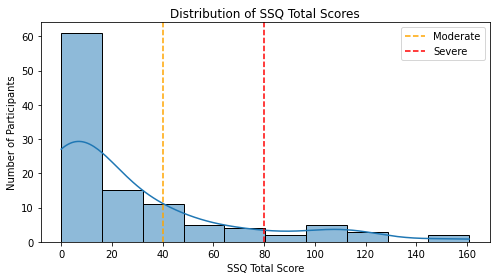

In [19]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(7, 4))
sns.histplot(final_scores['SSQ_Total'], bins=10, kde=True)
plt.axvline(40, color='orange', linestyle='--', label='Moderate')
plt.axvline(80, color='red', linestyle='--', label='Severe')
plt.title('Distribution of SSQ Total Scores')
plt.xlabel('SSQ Total Score')
plt.ylabel('Number of Participants')
plt.legend()
plt.tight_layout()
plt.show()

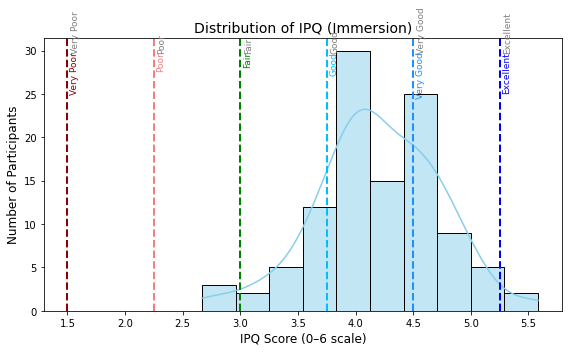

In [21]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# 데이터프레임에 IPQ 컬럼이 있다고 가정
# df = pd.read_csv("your_data.csv")

plt.figure(figsize=(8, 5))
sns.histplot(final_scores['IPQ_Total_mean'], bins=10, kde=True, color='skyblue', edgecolor='black')

# 등급 기준선 및 색상
cutoffs = [1.50, 2.25, 3.00, 3.75, 4.50, 5.25]
labels = ['Very Poor', 'Poor', 'Fair', 'Good', 'Very Good', 'Excellent']
colors = ['darkred', 'lightcoral', 'green', 'deepskyblue', 'dodgerblue', 'blue']

for c, label, color in zip(cutoffs, labels, colors):
    plt.axvline(c, color=color, linestyle='--', linewidth=2, label=label)
    plt.text(c + 0.02, plt.ylim()[1]*0.95, label, rotation=90, color=color, fontsize=9, va='top')

# 제목 및 라벨
plt.title('Distribution of IPQ (Immersion)', fontsize=14)
plt.xlabel('IPQ Score (0–6 scale)', fontsize=12)
plt.ylabel('Number of Participants', fontsize=12)

# 커스텀 등급 범례 (선택사항)
for i, c in enumerate(cutoffs):
    plt.text(c + 0.03, plt.ylim()[1]*0.95, labels[i], rotation=90, color='gray', fontsize=9)

plt.tight_layout()
plt.show()


In [46]:
survey_data

,SSQ_N,SSQ_O,SSQ_D,IPQ,STAI_Y_S
2,8.0,8.0,7.0,65.0,38.0
3,14.0,14.0,3.0,59.0,36.0
4,0.0,0.0,0.0,45.0,44.0
5,0.0,0.0,0.0,58.0,45.0
6,1.0,1.0,0.0,55.0,37.0
...,...,...,...,...,...
105,8.0,8.0,11.0,67.0,32.0
106,2.0,2.0,1.0,41.0,48.0
107,0.0,0.0,0.0,51.0,43.0
108,2.0,2.0,0.0,60.0,44.0
